# Analisis y modelado del sistema 

<style>
.justify-text {
  text-align: justify;
}
</style>

<div class="justify-text">
La epidemia del COVID-19 fdsfdasfgdsagfdasfgdasgasdf


</div>

# Introducción
<style>
.justify-text {
  text-align: justify;
}
</style>

<div class="justify-text">



# Derivación del modelo


 El punto de partida es el modelo SEIR básico con la adición de un compartimento adicional L:
 </div>

$$
\begin{align}
    \frac{dS}{dt} &= -\frac{\beta IS}{N} \tag{1} \\
    \frac{dE}{dt} &= \frac{\beta IS}{N} - \epsilon E \tag{2} \\
    \frac{dI}{dt} &= \epsilon E - \gamma I \tag{3} \\
    \frac{dL}{dt} &= \gamma I - \delta L \tag{4} \\
    \frac{dR}{dt} &= \delta L \tag{5}
\end{align}
$$

- $N$: La población total.
- $S$: El número de individuos Susceptibles.
- $E$: El número de individuos Expuestos que han contraído la infección pero aún no son infecciosos.
- $I$: El número de individuos Infectados.
- $L$: El número de sujetos que aún están infectados pero ya no son infecciosos debido a hospitalización, cuarentena, o porque los sujetos infectados son mayormente infecciosos solo durante los primeros días después del final del período de latencia.
- $R$: El número de individuos Recuperados y resistentes a futuras infecciones.
- $\beta$: La tasa de transmisión efectiva.
- $\epsilon$: La tasa inversa del período promedio de incubación antes de que uno se vuelva infeccioso.
- $\gamma$: La tasa inversa del tiempo promedio que los sujetos infectados pasan siendo infecciosos.
- $\delta$: La tasa inversa del tiempo promedio que los sujetos infectados permanecen enfermos pero no infecciosos.


$$
\begin{align}
    \frac{dE_t}{dt} &= \beta(u(t), d(t))I_t - \epsilon E_t \tag{6} \\
    \frac{dI_t}{dt} &= \epsilon E_t - \gamma I_t \tag{7} \\
    \frac{dL_t}{dt} &= \gamma I_t - \delta L_t \tag{8} \\
    \frac{dT_t}{dt} &= \epsilon E_t \tag{9} \\
    N_r(t) &= \epsilon E_t(t - \tau_m) \tag{10} \\
    A_r(t) &= I_t(t - \tau_m) + L_t(t - \tau_m) \tag{11} \\
    T_r(t) &= T_t(t - \tau_m) \tag{12-}
\end{align}
$$

La tabla contiene los parametros para cada pais afectado por la enfermedad, como se observa a continuación:

<br>

<style>
.center {
  margin-left: auto;
  margin-right: auto;
}
table {
  width: 90%;
  border-collapse: collapse;
}
th, td {
  padding: 7px;
  text-align: center;
  border-bottom: 1px solid #ddd;
}

</style>

<center>

| País | Periodo                | $\beta_0$ | $1/\gamma$ | $1/\epsilon$ | $1/\delta$ | $t_{1}, \rho_{1}$ | $t_{2}, \rho_{2}$ | $R_0$ | $R_1$ | $R_2$ | $T_{d0}$ | $T_{d1}$ | $T_m$ |
|---------|-----------------------|---------------|----------------|------------------|----------------|----------------------|----------------------|-----------|-----------|-----------|-------------|-------------|------------|
| China   | 18/01/2020 - 11/02/2020 | 1.6           | 2.5            | 5.0              | N/A            | 0, 0.63              | 5, 0.160             | 4.0       | 2.5       | 0.64      | 2.5         | 4.3         | 12         |
| Italy   | 22/02/2020 - 01/05/2020 | 1.3           | 3.1            | 4.3              | 33             | 2, 0.56              | 19, 0.205            | 4.0       | 2.6       | 0.82      | 2.6         | 5.2         | 9          |
| France  | 28/02/2020 - 03/05/2020 | 1.3           | 2.9            | 5.0              | 29             | 2, 0.60              | 17, 0.195            | 3.8       | 2.8       | 0.74      | 2.8         | 5.3         | 12         |
| UK      | 01/03/2020 - 10/05/2020 | 1.28          | 2.8            | 6.2              | N/A            | 15, 0.65             | 25, 0.270            | 3.6       | 2.34      | 0.97      | 3.4         | 5.8         | 10         |

</center>  

<br>


Se realizará el analisis del modelo en python para cada caso.

# Simulación del Modelo COVID-19 en Python

Para realizar la simulación en python se utilizaran las librerias Solve_ivp, matplotlib y numpy, en donde se van a ocupar en cada caso.

In [9]:

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

## Modelo evaluado en parametros de Reino Unido

Se reemplazo el modelo Covid en los parametros del Reino unido:

In [10]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.28  #Tasa de transmisión inicial
gamma = 1/2.8  #Tasa de recuperación
epsilon = 1/6.2  #Tasa de incubación
delta = 0  #Tasa de mortalidad
tau_m = 10  #Retraso en días
t1 = 15
rho1 = 0.65
t2 = 25
rho2 = 0.27

In [11]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

La función beta, hace que cambie beta_0 para diferentes tiempos.

In [12]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [13]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [14]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [15]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])


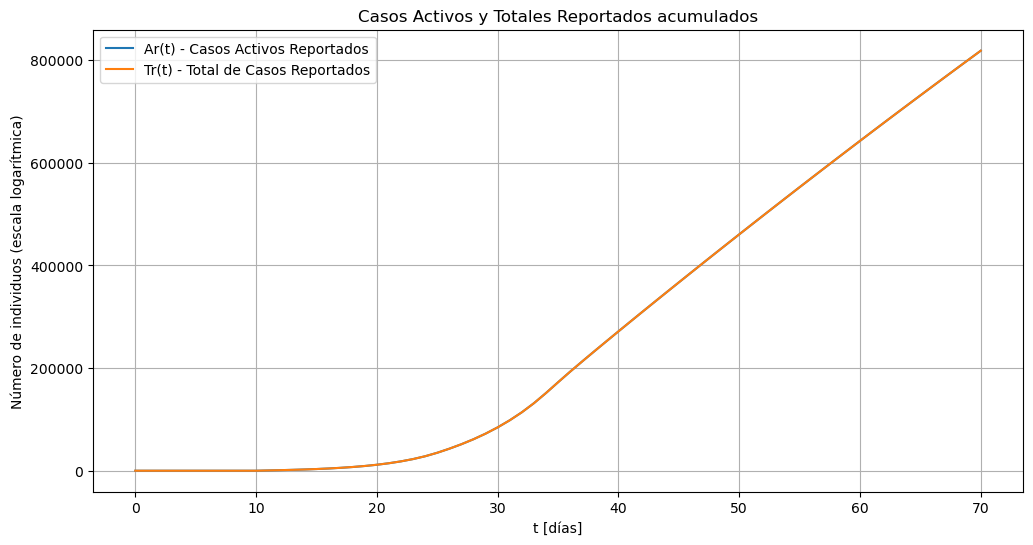

In [16]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale()  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

## Conclusión 
La conclusion del grafico es:


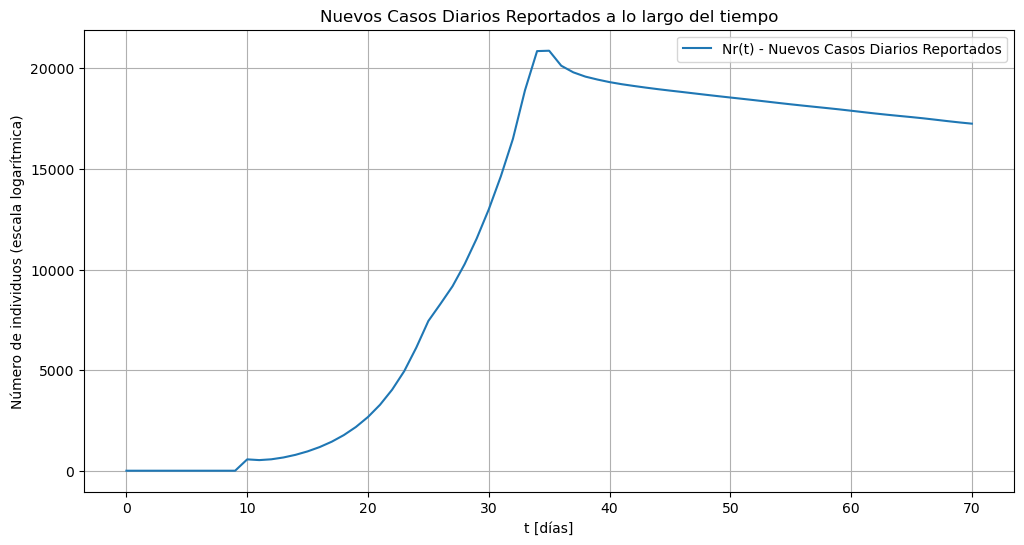

In [17]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

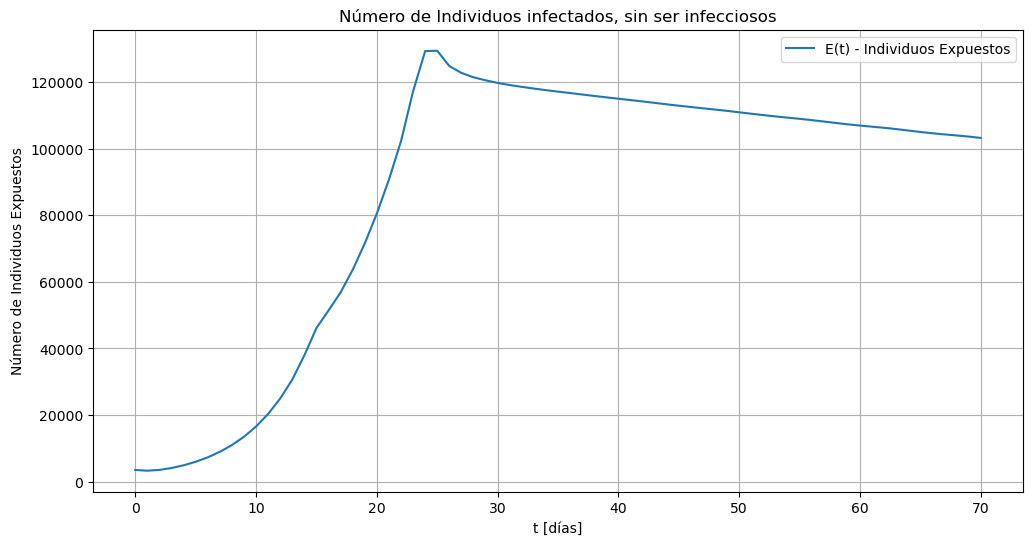

In [18]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

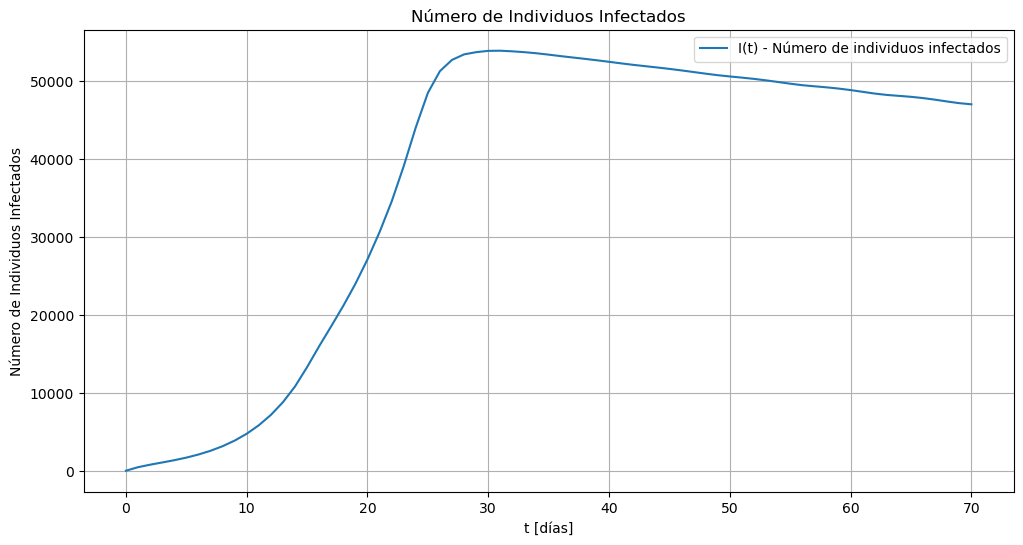

In [19]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

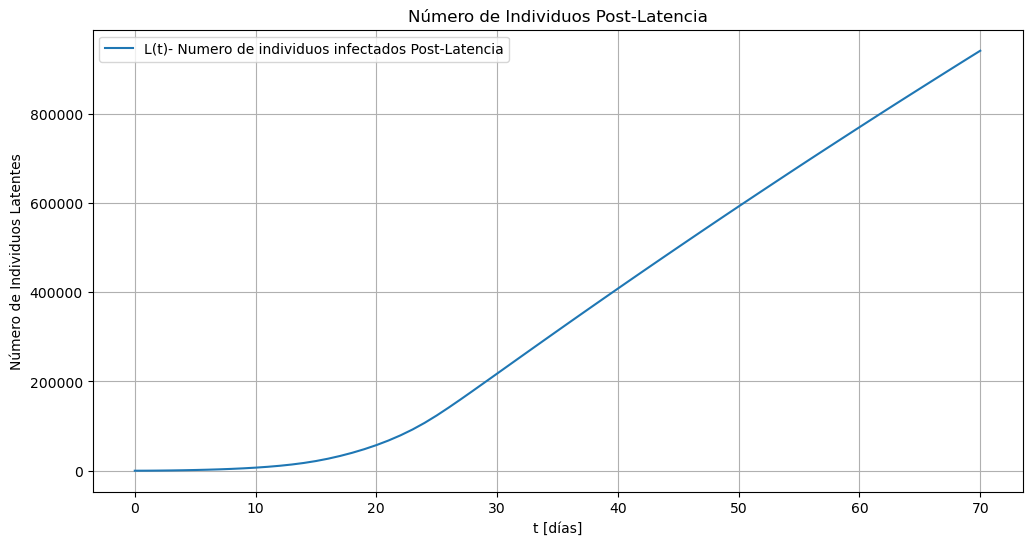

In [20]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

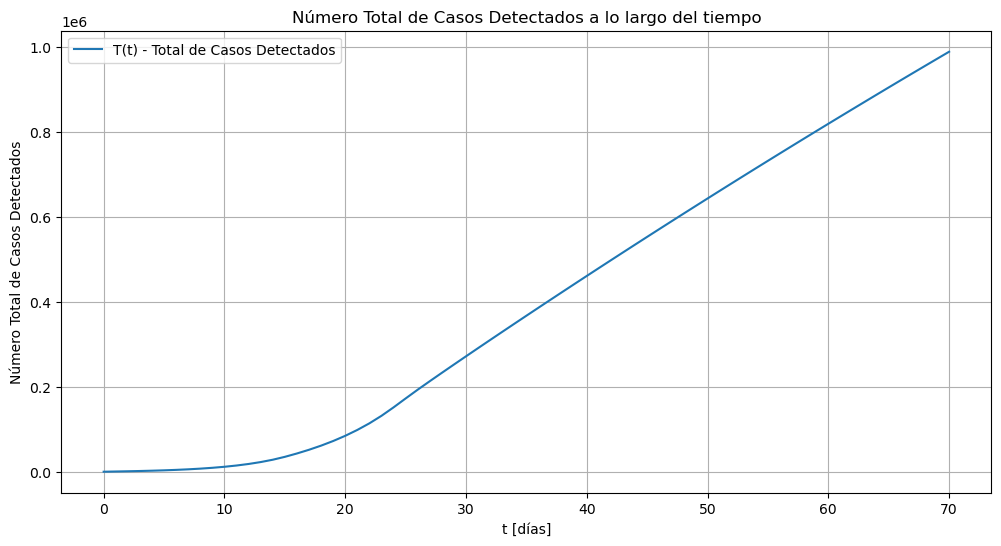

In [21]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de China

Se reemplazo el modelo Covid en los parametros del China:

In [22]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.6  #Tasa de transmisión inicial
gamma = 1/2.5  #Tasa de recuperación
epsilon = 1/5  #Tasa de incubación
delta = 0  #Tasa de mortalidad
tau_m = 12  #Retraso en días
t1 = 0
rho1 = 0.63
t2 = 5
rho2 = 0.160

In [23]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [24]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [25]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [26]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [27]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

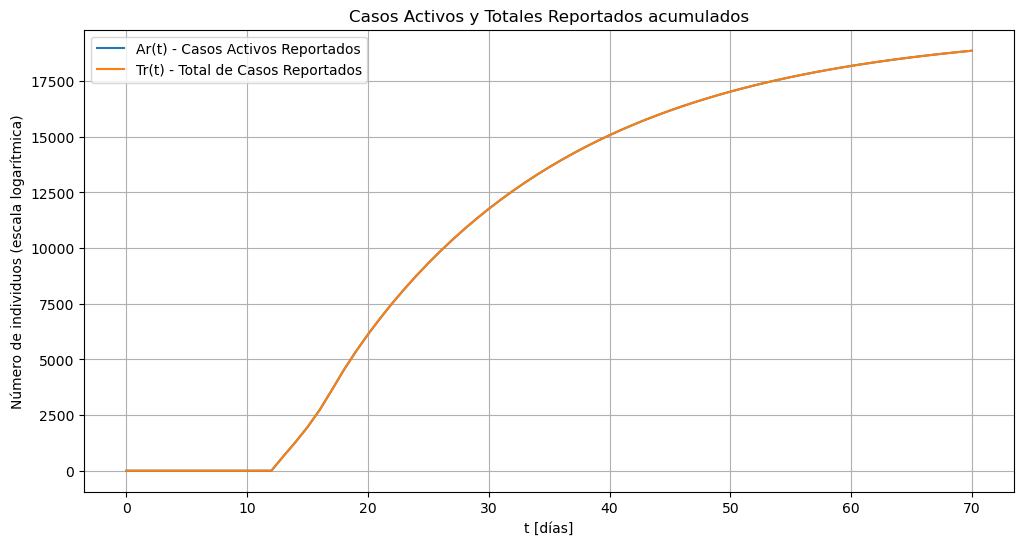

In [28]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

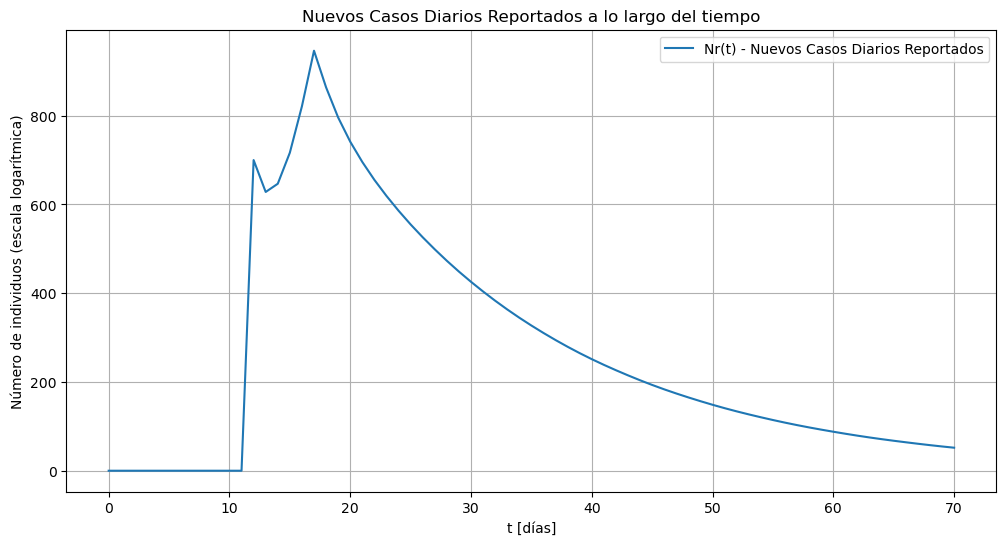

In [29]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

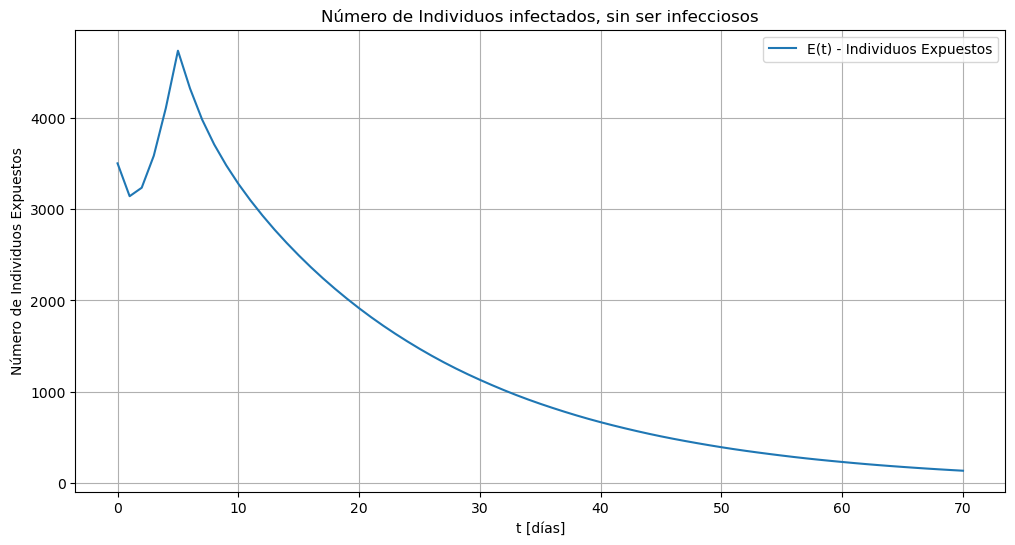

In [30]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

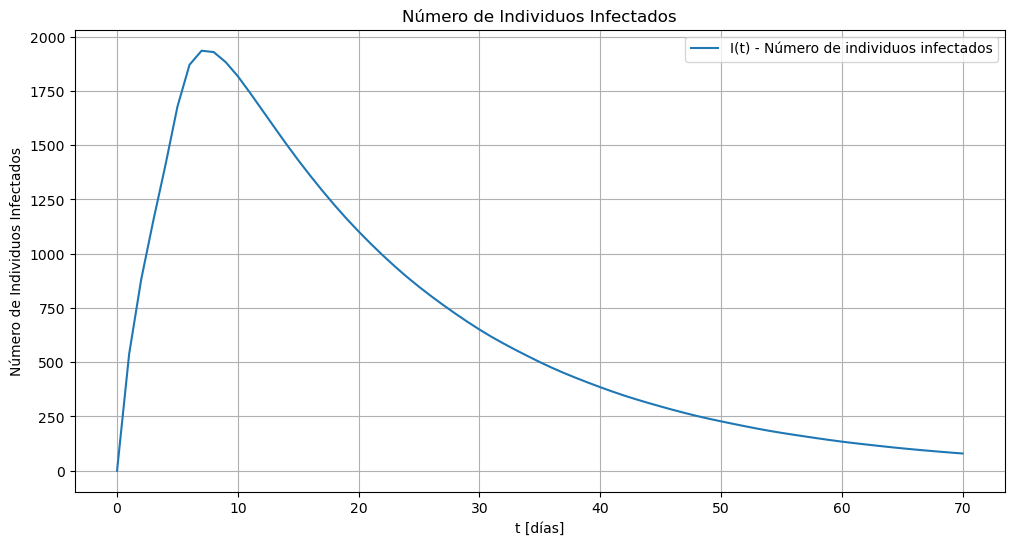

In [31]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

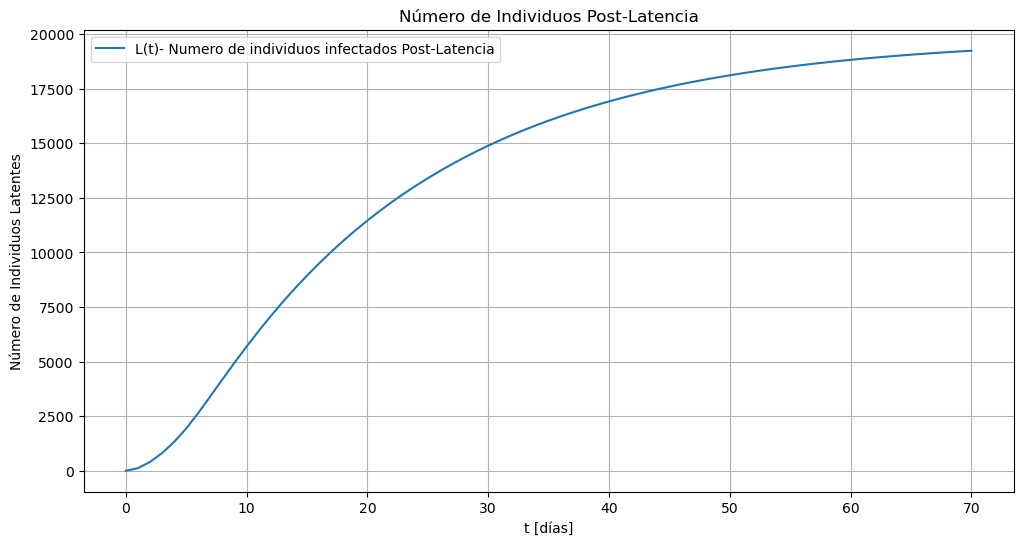

In [32]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

dhfefhddfhdaskh

Ideas:
- tengo que simular hasta 100 dias.

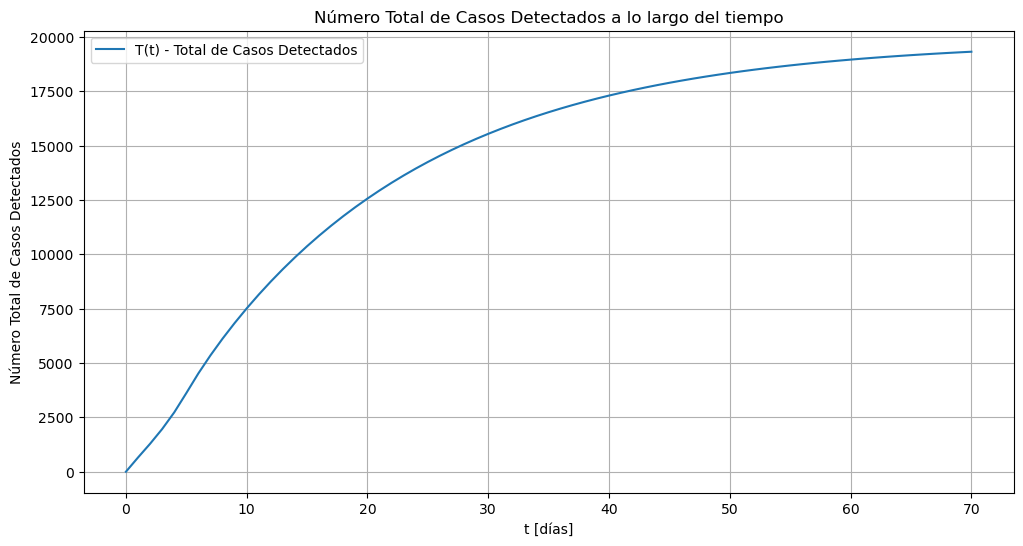

In [33]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de Italia

Se reemplazo el modelo Covid en los parametros del Italia:

In [34]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de transmisión inicial
gamma = 1/3.1  #Tasa de recuperación
epsilon = 1/4.3  #Tasa de incubación
delta = 1/33  #Tasa de mortalidad
tau_m = 9  #Retraso en días
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205

In [35]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [36]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t* I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [37]:
# Parámetros adicionales
R0 = 4  #El número básico de reproducción, ajustar según el país o la situación

#Calculando gamma (tasa de recuperación) y r0 (eigenvalor)
r0 = ((-(epsilon + gamma)) + np.sqrt((epsilon + gamma)**2 + 4 * epsilon * (beta_0 - gamma))) / 2

#Condición inicial para I0
I0 = 67

# Calculando la condición inicial para E0
E0 = beta_0 * I0 / (r0 + epsilon)

# Inicializar historia con condiciones iniciales
L0 = 0  #Asumiendo que L0 es igual a I0
T0 = 0  #Asumiendo que T0 es igual a I0
y0 = [E0, I0, L0, T0]

In [38]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [39]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

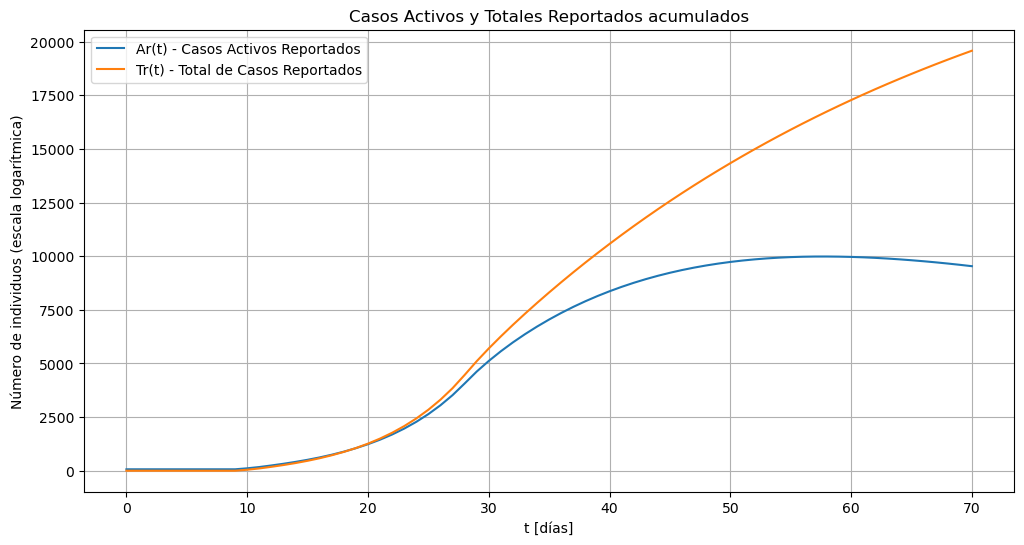

In [40]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

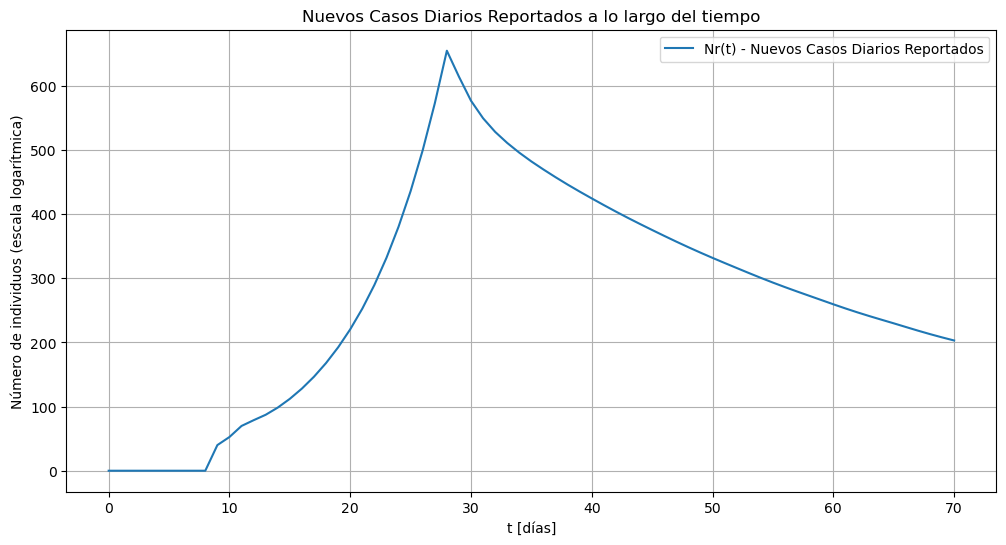

In [41]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

- Ver como inicia Nr para valores t>=tau_m

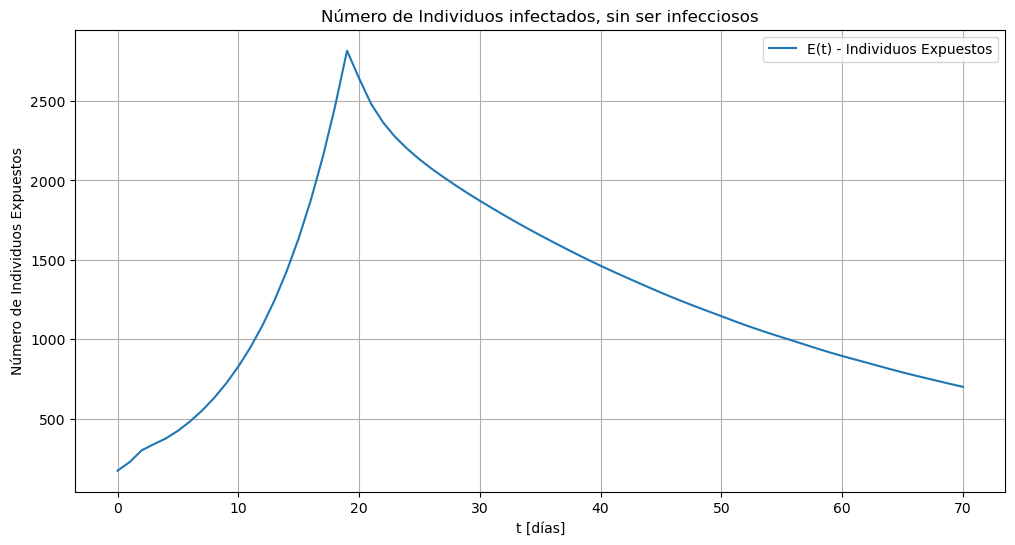

In [42]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

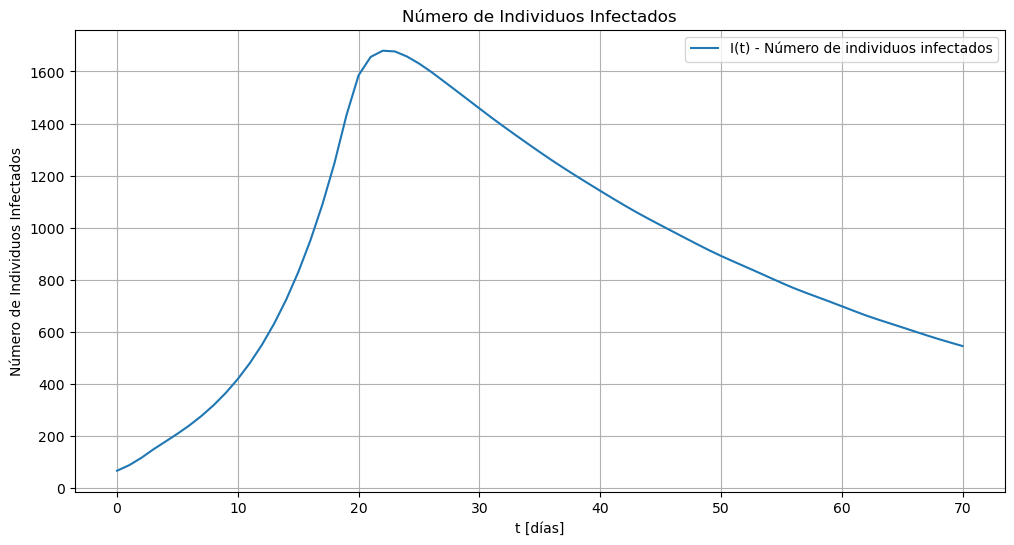

In [43]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

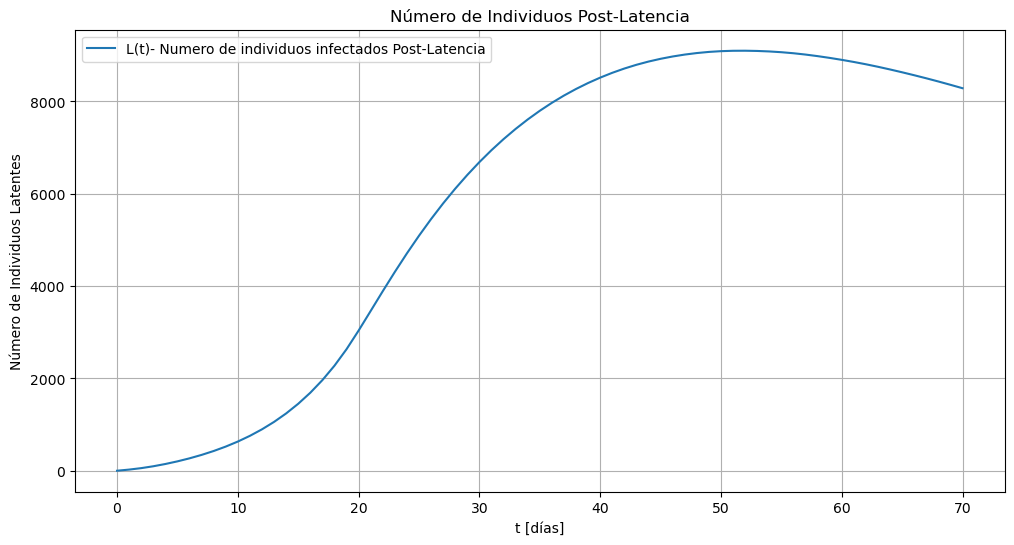

In [44]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

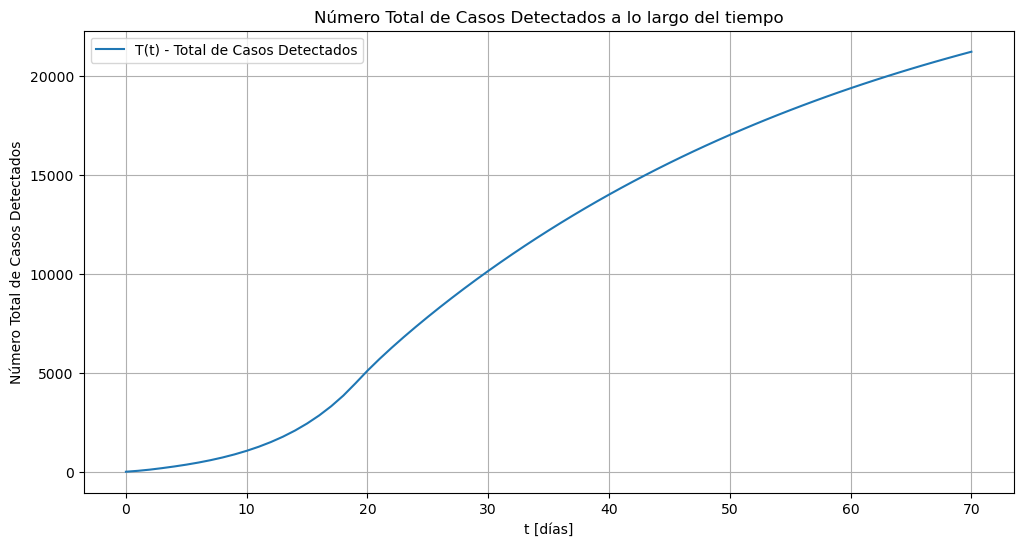

In [45]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de Francia

Se reemplazo el modelo Covid en los parametros del Francia:

In [46]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de transmisión inicial
gamma = 1/2.9  #Tasa de recuperación
epsilon = 1/5.0  #Tasa de incubación
delta = 29  #Tasa de mortalidad
tau_m = 12  #Retraso en días
t1 = 2
rho1 = 0.60
t2 = 17
rho2 = 0.195

In [47]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [48]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [49]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [50]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [51]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

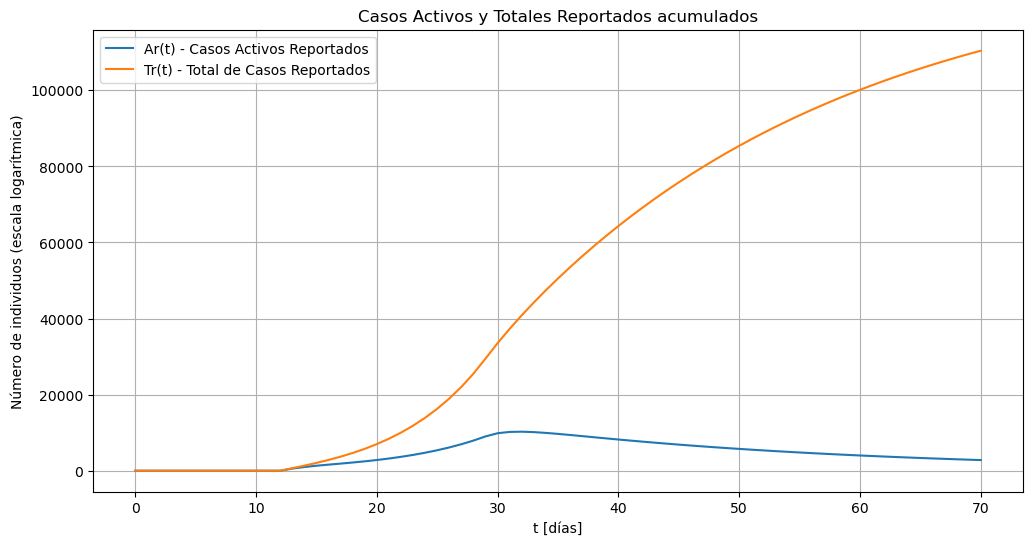

In [52]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

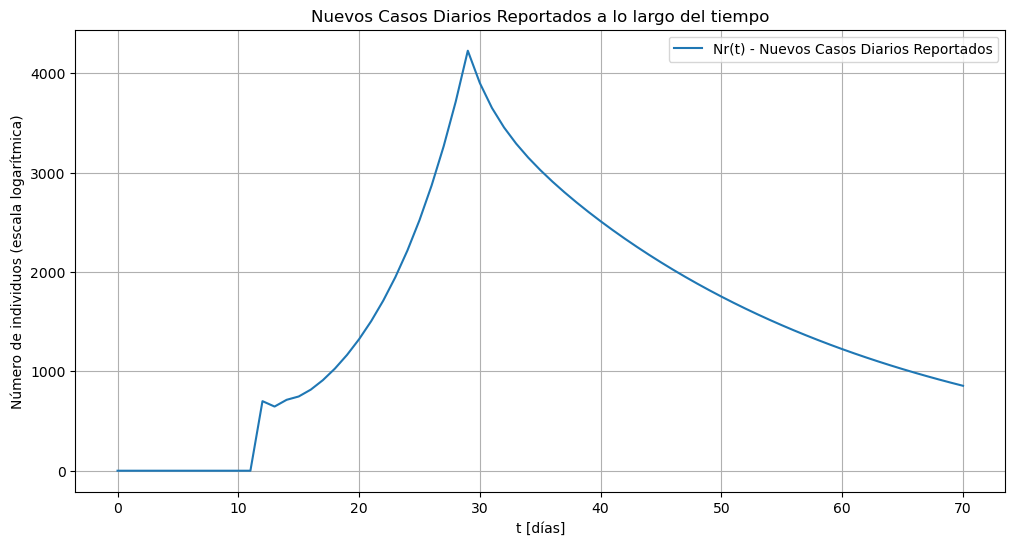

In [53]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

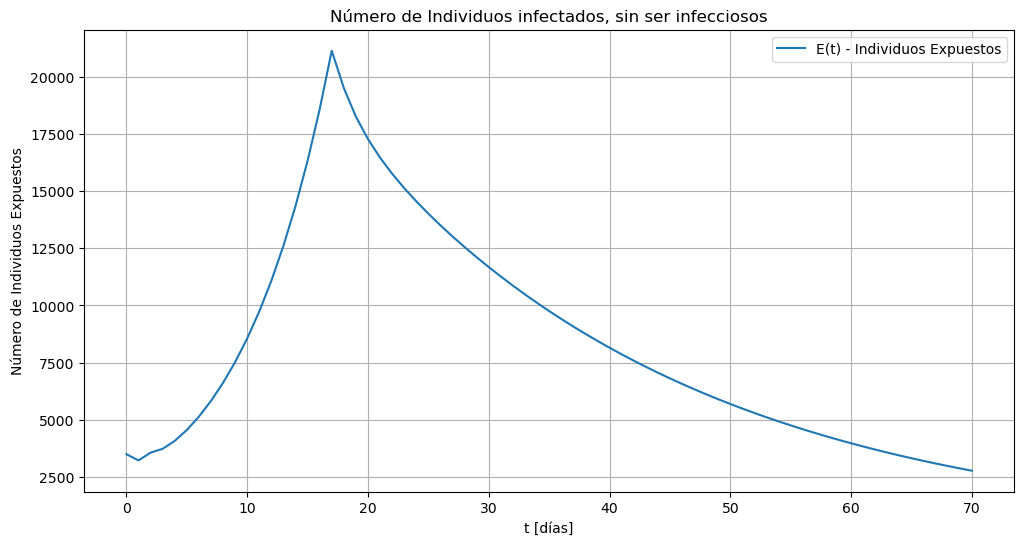

In [54]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

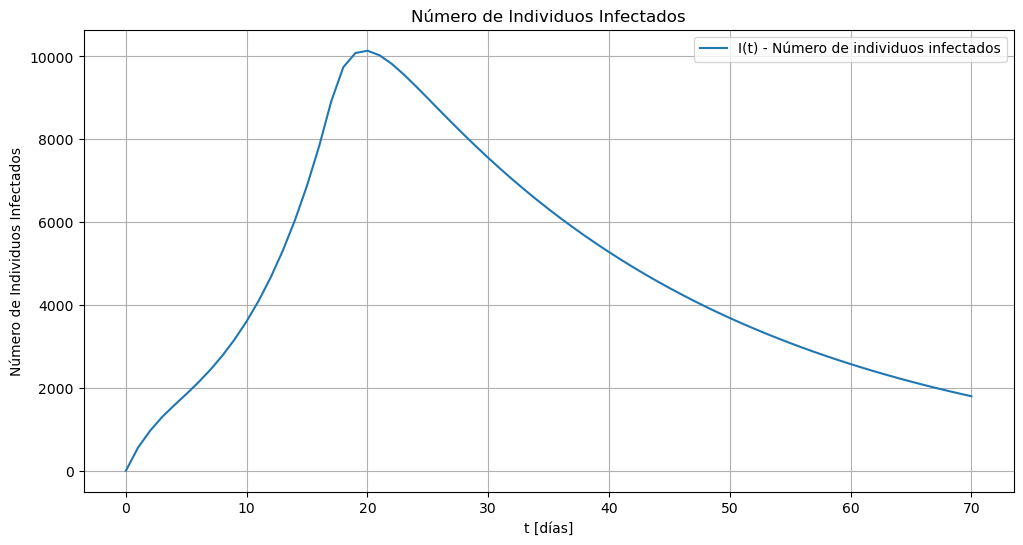

In [55]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

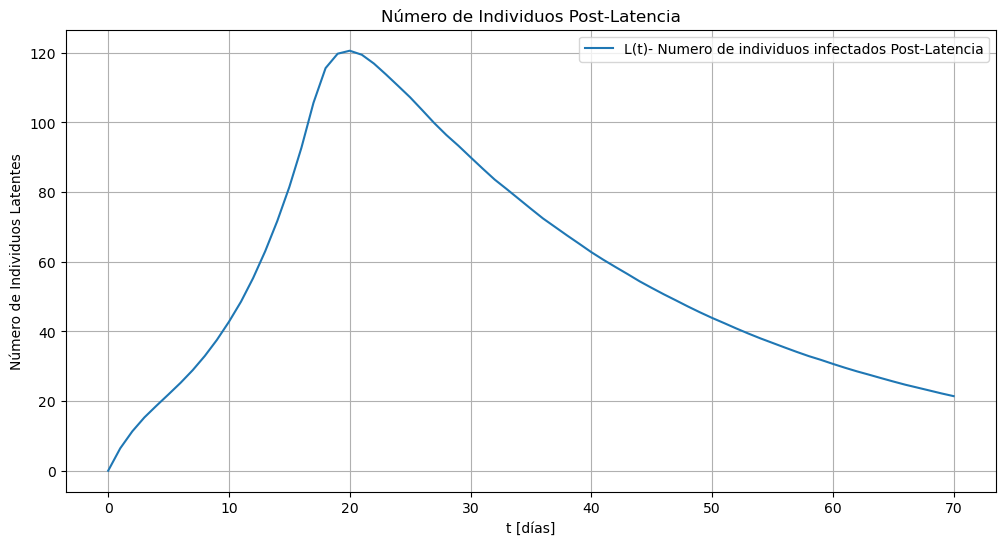

In [56]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

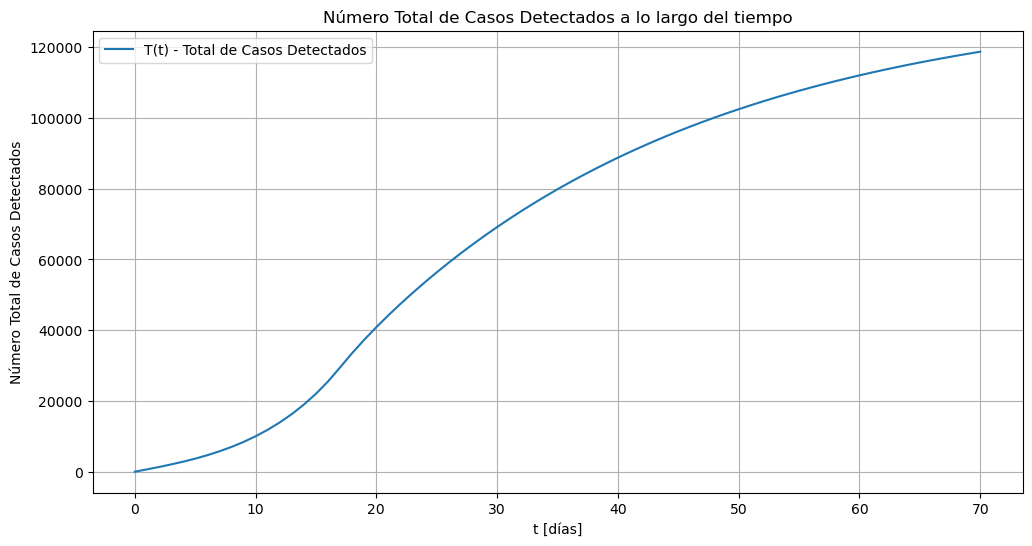

In [57]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

# Variación de la entrada $u(t)$
En este caso se hace variar la entrada $u(t)$ para el caso de Italia:


In [58]:
#Parámetros para el Italia, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de infectividad inicial
gamma = 1/3.1  #Tasa de recuperación
epsilon = 1/4.3  #Tasa de latencia
delta = 1/33  #Tasa de mortalidad
tau_m = 9  #Retraso en dias
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205


In [59]:
#Función de entrada u(t) con valor variable
def u(t, u_valor):
    return u_valor  

#Lista de valores para ola entrada u(t)
u_valores = [0.2, 0.5, 0.7, 0.9]

#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2, u_valor):
    #u(t) con valor variable
    ut = u(t, u_valor)
    if t < t1:
        return beta_0 / ut
    elif t < t2:
        return (beta_0 * rho1) / ut
    else:
        return (beta_0 * rho2) / ut

In [60]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta, u_valor):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2, u_valor)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [61]:
# Parámetros adicionales
R0 = 4  #El número básico de reproducción, ajustar según el país o la situación

#Calculando gamma (tasa de recuperación) y r0 (eigenvalor)
r0 = ((-(epsilon + gamma)) + np.sqrt((epsilon + gamma)**2 + 4 * epsilon * (beta_0 - gamma))) / 2

#Condición inicial para I0
I0 = 67

# Calculando la condición inicial para E0
E0 = beta_0 * I0 / (r0 + epsilon)

# Inicializar historia con condiciones iniciales
L0 = 0  #Asumiendo que L0 es igual a I0
T0 = 0  #Asumiendo que T0 es igual a I0
y0 = [E0, I0, L0, T0]

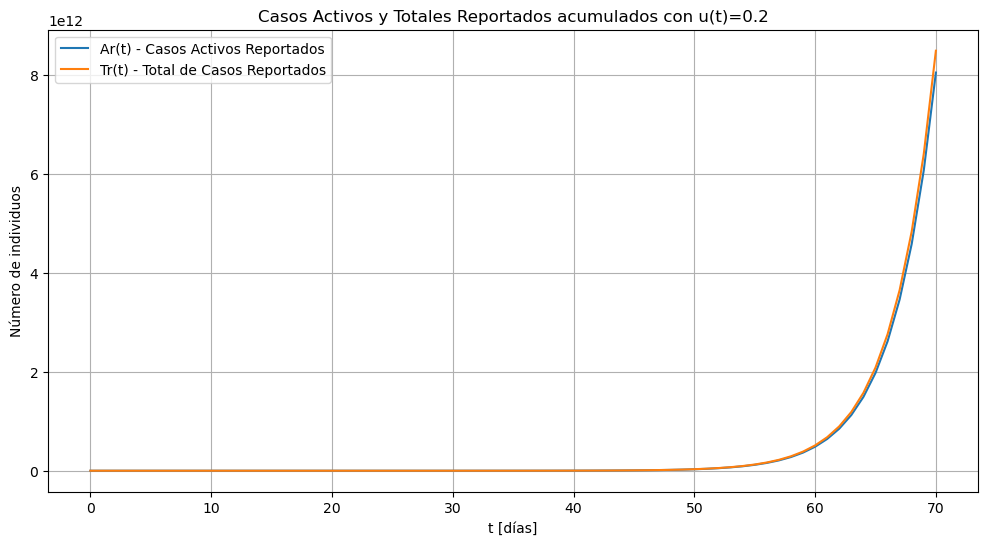

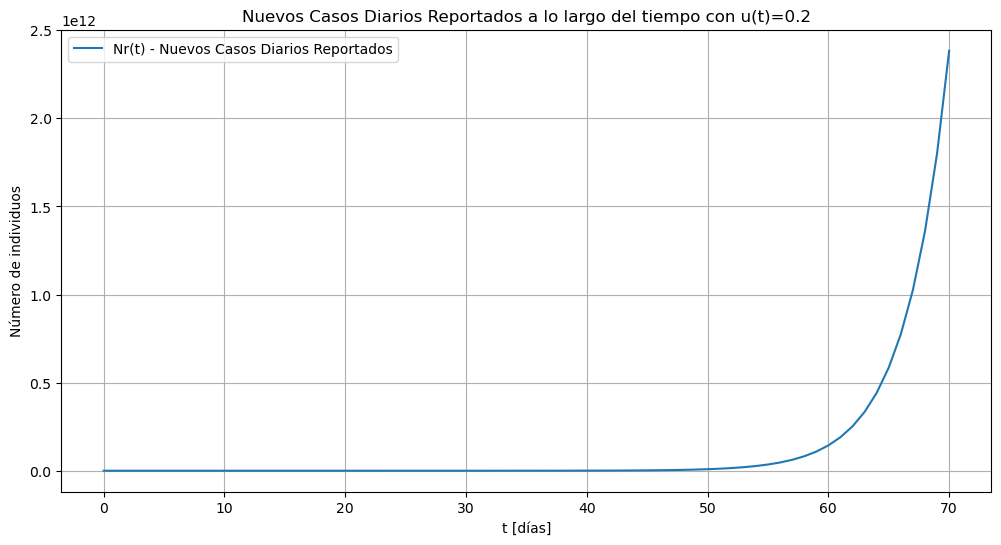

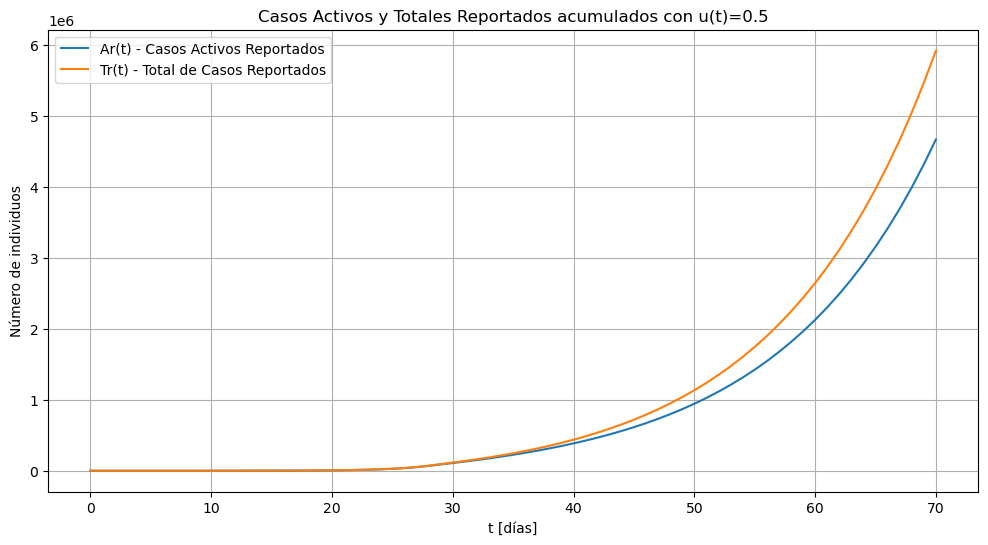

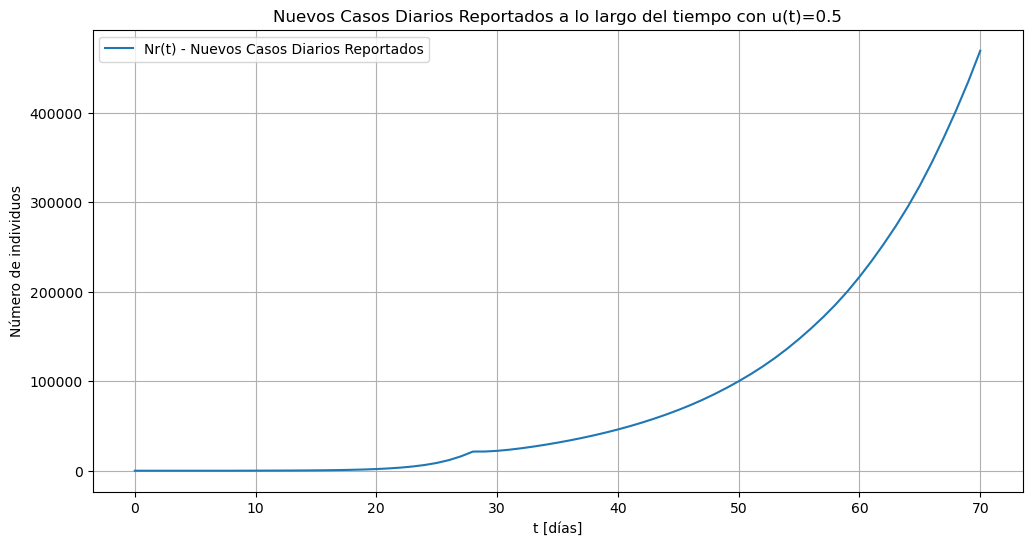

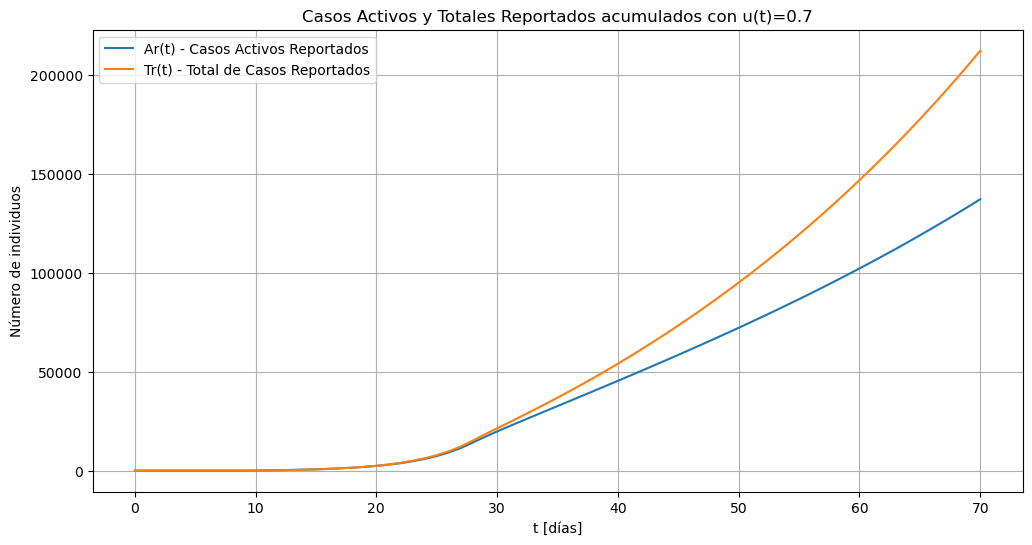

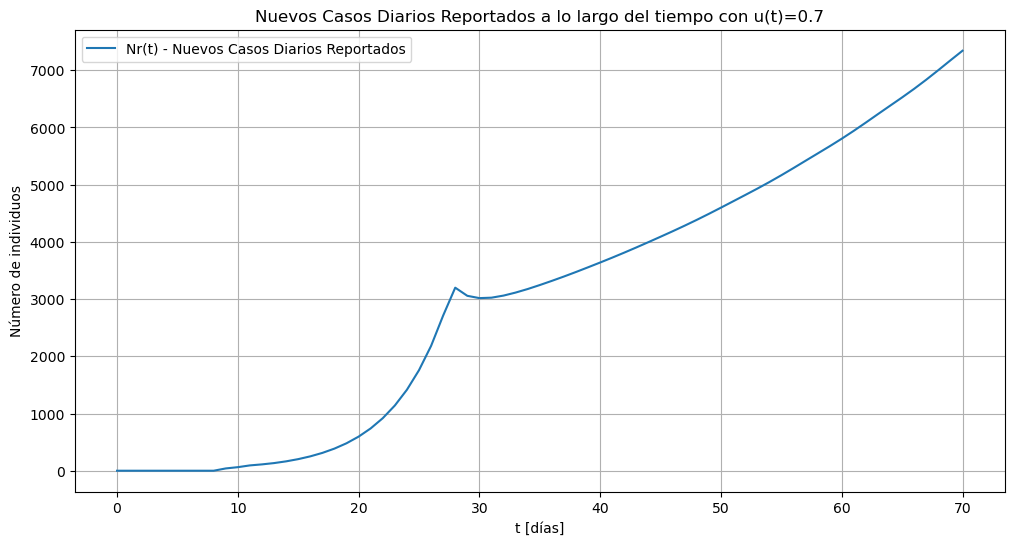

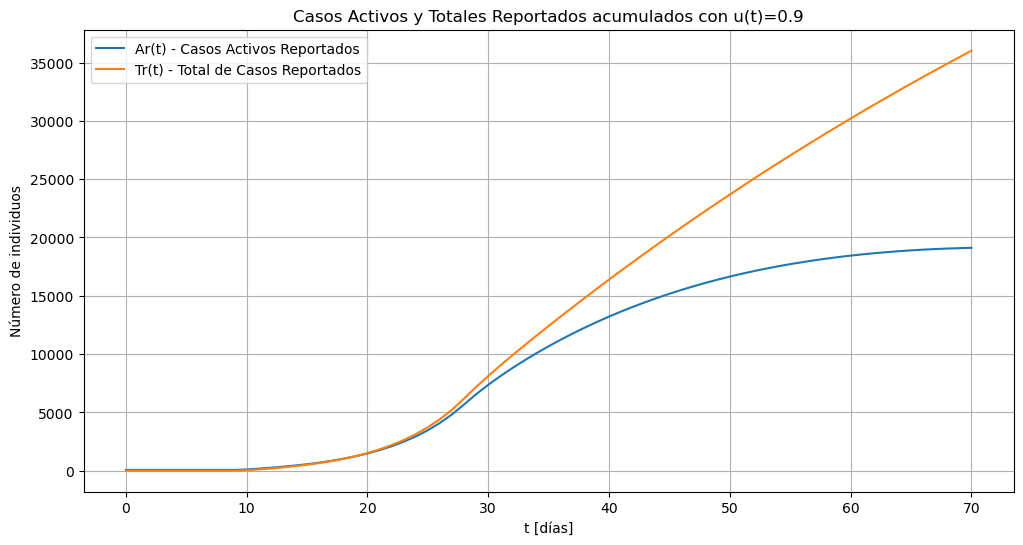

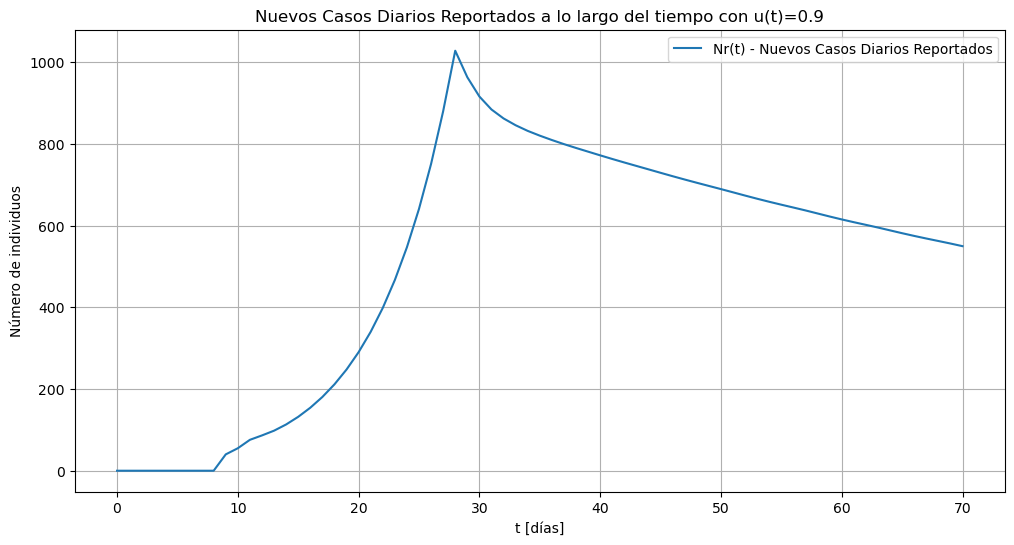

In [62]:
for u_valor in u_valores:
    #Tiempo de simulación
    t_span = [0, 70]  
    t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
    sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta, u_valor), t_eval=t_eval, dense_output=True)

    #Interpolación para manejar retrasos
    sol_interp = sol.sol

    #Calculamos Nr, Ar y Tr con los retrasos
    Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
    Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
    Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

    #Graficar Ar y Tr
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
    plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
    plt.title(f'Casos Activos y Totales Reportados acumulados con u(t)={u_valor}')
    plt.xlabel('t [días]')
    plt.ylabel('Número de individuos')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Graficar Nr
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
    plt.title(f'Nuevos Casos Diarios Reportados a lo largo del tiempo con u(t)={u_valor}')
    plt.xlabel('t [días]')
    plt.ylabel('Número de individuos')
    plt.legend()
    plt.grid(True)
    plt.show()

De los graficos podemos inferir que:

- Mientras menos medidas de aislamiento se adoptan ($u(t) < 0.7$), las curvas de los casos activos $A_{r}$ crece exponencialmente y por lo tanto las curvas de nuevos casos reportados $N_{r}$ también se ven afectadas.
- En cambio cuando las medidas contra el COVID-19 son estrictas (con entradas $u(t)$ a $1$), los casos activos $A_{r}$ se estabilizan en un punto de equilibrio y la cantidad de nuevos casos reportados $N_{r}$ cae exponencialmente.

## Representación en espacio de estados
La representación del vector de estado transpuesto se puede observar a continuación:

$$
\mathbf{x}(t)^T = [x_1, x_2, x_3, x_4]
$$

Donde:

$$
\begin{align*}
x_1 = E_t, \quad
x_2 = I_t, \quad
x_3 = L_t, \quad
x_4 = T_t, \quad
u_1 = u(t)
\end{align*}
$$

El espacio de estado, se puede obtener linealizando el modelo mediante Taylor de primer orden,

$$
\Delta\dot x_j \approx \frac{dx_j}{dt} \approx f(\mathbf{x}_{ie}, u_{1e}) + K_{ji}  \Delta x_i + \frac{\partial f_j}{\partial u_1} \Bigg|_{\substack{\mathbf{x_i}=\mathbf{x}_{ie} \\ u_1 =u_{1e}}} \Delta u_1
$$

donde

$$ K_{ji} = \frac{\partial f_j}{\partial x_i} \Bigg|_{\substack{\mathbf{x_i}=\mathbf{x}_{ie} \\ u_1 =u_{1e}}}
$$

$$\Delta x_i = x_i - x_{ie}$$
$$\Delta u_1 = u_1 - u_{1e}$$

El modelo de espacio de estado resultante para una salida $Y(t)=[\Delta\dot N_r,  \Delta\dot A_r,  \Delta\dot T_r  ]^T$:

$$
\begin{align*}
\dot{\mathbf{x}}(t) & = A\mathbf{x}(t) + B\mathbf{u}(t) \\
Y(t) & = C\mathbf{x}(t) \\
\end{align*}
$$

Los vectores $\dot{\mathbf{x}}(t)$, $\mathbf{x}(t)$ y $\mathbf{u}(t)$ resultantes:

$$
\dot{\mathbf{x}}(t)^T = [\Delta  \dot{x}_1, \Delta \dot{x}_2, \Delta \dot{x}_3, \Delta \dot{x}_4]
$$

$$
{\mathbf{x}}(t)^T = [\Delta{x}_1, \Delta {x}_2, \Delta {x}_3, \Delta {x}_4]
$$

$$
{\mathbf{u}}(t) = \Delta u_1
$$

donde

$$
A = \begin{bmatrix}
-\epsilon & \frac{\beta_{0}}{\mu_{e}} & 0 & 0  \\
\epsilon & -\gamma & 0 & 0  \\
0 & \gamma  & \delta & 0 \\
\epsilon & 0 & 0 & 0 \\
\end{bmatrix}
$$

$$
B^T = \begin{bmatrix}
\beta_{0} I_{te} & 0 & 0 & 0
\end{bmatrix}
$$

Falta la matriz C:
$$
C = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}
$$

Los puntos de equilibrio se pueden obtener cuando las ecuaciones diferenciales no sufren cambios:


$$\frac{dE_{t}}{dt} = \frac{dI_{t}}{dt} = \frac{dL_{t}}{dt} = \frac{dT_{t}}{dt} = 0$$

por lo tanto,

$$E_{t}=\frac{\beta_{0}}{\epsilon u_e}I_{t}$$

$$I_{t}=\frac{\epsilon}{\gamma}E_{t}$$

$$L_{t}=\frac{\gamma}{\delta}I_{t}$$

$$T_{t} = 0 $$

Para encontrar un punto de equilibrio solo basta encontrar $I_{t}$.


In [63]:
#Función de entrada u(t)
def u(t):
    return 0.9  #Valor constante 

#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    #u(t) es monotonica decreciente
    ut = u(t)
    if t < t1:
        return beta_0/ut
    elif t < t2:
        return (beta_0 * rho1)/ut
    else:
        return (beta_0 * rho2)/ut

def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t* I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]


In [64]:
#Resolver el modelo
t_span = [0, 600]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)
It=sol.y[1]

In [65]:
# Calcular los valores de equilibrio a partir de Ite
Ite = np.mean(It[-50:])
print(f"Ite: {Ite:.2f}")

Ite: 5.29


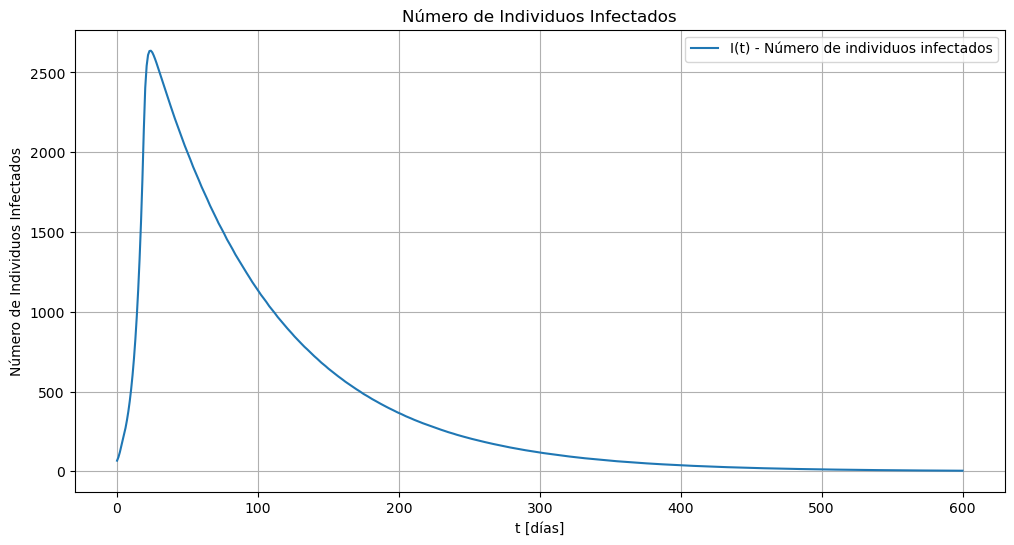

In [66]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

# Saturación del sistema de salud

Contexto: Una epidemia es un fenómeno que afecta tanto al sistema de salud público como la economía. Por un lado se busca que la menor cantidad de personas se enfermen y mueren y eso se logra con las restricciones mas abruptas, pero por otro lado cerrar las escuelas, universidades y el comercio y estar en confinamiento tiene efectos a corto y a largo plazo negativos en la economía y la estabilidad de los gobiernos. Por esa razón los entes reguladores deben tomar las mejores decisiones para buscar el punto óptimo.
Tambien, el servicio de sistema de salud se puede ver colapsado si la cantidad de persoans que necesitan cuidados intensivos aumenta. 
Esto tiene consecuencias muy graves dado que personas que tienen la capacidad de no perder su vida si al menos tuvieran el acceso a la salud. 

Para ello debemos tomar atencion en el peak de Ar(t).
Definimos lo siguiente:

$$
\begin{align}
    A_p=max[Ar(t)] \tag{13} \\
\end{align}
$$

y

$$
\begin{align}
    M=\frac{A_p}{Ar(t)} \tag{14} \\
\end{align}
$$



siendo:

$A_p$: El máximo valor que toma $A_r(t)$
M: Razón de casos activos que requieren cuidados intensivos para todo t.
$\sigma$: Valor de casos activos que requieren cuidados intensivos
$N_ic$: Cantidad de camas disponibles que existen para cuidados intensivos.

Podemos definir una cota donde no se sature el sistema de salud de la siguiente forma:

$$
\begin{align}
    A_s < \frac{N_ic}{\sigma M} \tag{15} \\
\end{align}
$$



Si se busca proteger el sistema de salud y evitar una saturación, y también se busca no sacrificar la economía entonces:
$A_s$ no deberá sobrepasar a $\frac{N_{ic}}{\sigma M}$

De acuerdo a la BBC (2020) LA cnatidad de camas disponibles durante la pandemia de covid-19 en Italia era de 5200. Fuente: https://www.bbc.com/mundo/noticias-51919561





In [67]:
Ap=np.max(Ar)
#El valor de M ha sido calculado de 8 para el caso de Italia
M=8

#El valor de sigma para el caso de Italia se ha supuesto de 4% de todos los casos activos
sigma=0.04


#La cantidad de camas disponibles durante la pandemia era de:
Nic=5200

#La cantidad de camas disponibles no debe exeder de:
As=Nic/(sigma*M)

print("La cota que no debe sobrepasar el número de casos activos A_r para no saturar el servicio de salud es de")
print(As)



La cota que no debe sobrepasar el número de casos activos A_r para no saturar el servicio de salud es de
16250.0


# Supresión
El valor encotnrado de $A_s$ calculado anteriormente es importante porque es el punto donde en la mayoria de los casos se toman las medidas mas dr'asticas lo que se conoce como supresion.

La estrategia de supresión se puede resumir brutalmente en los siguientes términos: tan pronto como $A_r(t)$ alcance un valor As que sea lo suficientemente aterrador como para que los tomadores de decisiones superen su renuencia a alterar la vida social y económica de su país, se toman medidas drásticas de contención:

En esos casos la entrada $u(t)$ queda de la siguiente forma:

$$
\begin{align}
   u(t)=\left\{\begin{matrix}
0, & A_r(t)< A_s\\ 
\bar{u},  & A_r(t)\geq A_s
\end{matrix}\right. \tag{16} \\
    
\end{align}
$$
